# Entre Muestras y Patrones: Esculpiendo la Realidad

## Parámetros de población y parámetros estimados

La estadística desempeña un papel crucial en la comprensión y el análisis de las características poblacionales, especialmente a través del estudio de parámetros como la media y la desviación estándar. Estos parámetros no solo ofrecen una visión del centro y la dispersión de los datos dentro de una población, sino que también son fundamentales para la evaluación de riesgos y la toma de decisiones en diversos campos como la salud, la economía y la ciencia social. Dada la impracticabilidad de medir a toda una población, la estadística recurre a la estimación de estos parámetros a partir de muestras representativas. Este enfoque permite inferencias precisas sobre la población total, manteniendo la reproducibilidad y la confiabilidad de los resultados, aspectos esenciales en la investigación y la aplicación de tecnologías avanzadas como el aprendizaje automático.

## Parámetros de la Población

La comprensión de los parámetros poblacionales es esencial en el análisis estadístico, particularmente en el estudio de distribuciones estadísticas, como la distribución normal.

Considere, por ejemplo, el Índice de Masa Corporal (BMI), un indicador fundamental en el ámbito de la nutrición y la salud. Este índice, que mide la relación entre el peso y la altura de un individuo, es esencial para identificar riesgos de salud potenciales, tales como la obesidad o el bajo peso.

Para determinar los parámetros poblacionales, el primer paso es medir el BMI de cada sujeto en la población de interés. En el contexto ideal, donde se busca una comprensión completa de los parámetros poblacionales, es necesario medir el BMI de cada persona dentro de la población.

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import lognorm, norm

In [2]:
np.random.seed(0)

n = 100000
bmi_mean = 28.5
bmi_std = 2.5
bmi = np.random.normal(bmi_mean, bmi_std, n)
data = pd.DataFrame({'BMI': bmi})

In [3]:
fps=10
range_max = int((n**(1/2))/2)+1

def generate_sample_sizes():
    for i in range(0, range_max+1):
        yield min((i*2)**2+1, n)

/tmp/ipykernel_71902/3885889955.py:20: UserWarning: frames=<generator object generate_sample_sizes at 0x7f51f8b82e30> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=generate_sample_sizes(), init_func=init, repeat=False)


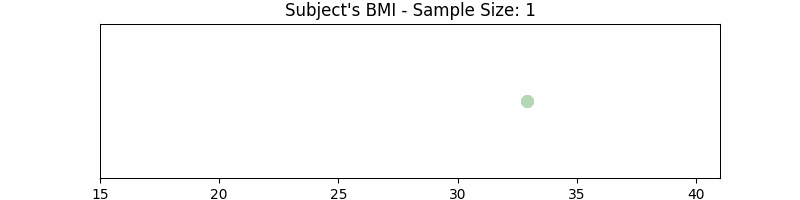

In [4]:
fig, ax = plt.subplots(figsize=(8, 2))

def init():
    ax.set_xlim(15, 41)
    ax.set_ylim(-1, 1)
    ax.set_xlabel("BMI")
    ax.set_title("Subject's BMI")
    ax.get_yaxis().set_visible(False)

def update(frame):
    ax.clear()
    current_sample = data.iloc[0:frame]
    sns.scatterplot(x=current_sample['BMI'], y=np.zeros_like(current_sample['BMI']), s=100, color="green", alpha=0.3, marker='o')
    ax.set_xlim(15, 41)
    ax.set_ylim(-1, 1)
    ax.set_xlabel("BMI")
    ax.set_title(f"Subject's BMI - Sample Size: {frame}")
    ax.get_yaxis().set_visible(False)

ani = FuncAnimation(fig, update, frames=generate_sample_sizes(), init_func=init, repeat=False)

gif_path = "bmi_samples.gif"
ani.save(gif_path, writer='pillow', fps=fps)
plt.close()
Image(open(gif_path,'rb').read())

Imaginemos que disponemos de los medios necesarios para medir el Índice de Masa Corporal (BMI) de toda una población. En este análisis, el histograma de las mediciones se convierte en una herramienta analítica clave. Al reflejar los datos de todos los sujetos, este histograma nos ofrece una imagen fidedigna de la población.

En nuestro caso, el histograma que resulta de medir el BMI de cada individuo se alinea con una distribución normal, que se distingue por una media de 28,5 y una desviación estándar de 2,5. Estos dos valores son fundamentales: la media nos señala el valor central donde se concentran los datos, y la desviación estándar nos muestra cuán dispersos están los datos alrededor de esa media. Es esta última es la que nos proporciona una medida esencial de la variabilidad o dispersión de los datos con respecto a la media.

En tales circunstancias, la media y la desviación estándar de la curva normal que representan esta población se conocen como los **parámetros poblacionales**. Estos incluyen la media poblacional y la desviación estándar poblacional.

In [5]:
def normal_function(data):
  mean = np.mean(data)
  std_dev = np.std(data)
  x_values = np.linspace(data.min(), data.max(), 100)
  y_values = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp( - (x_values - mean)**2 / (2 * std_dev**2))
  return y_values, x_values, mean, std_dev

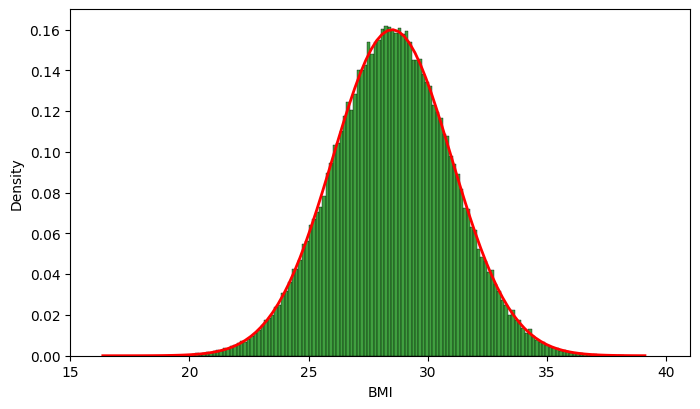

In [6]:
y_values, x_values, _, _ = normal_function(data['BMI'])

plt.figure(figsize=(8, 4.5))
plt.plot(x_values, y_values, color='red', lw=2)
histplot = sns.histplot(data['BMI'], color="green", stat="density", kde=False)
plt.xlim(15, 41)
plt.show()

### Cálculo de Probabilidades

El histograma que hemos construido a partir de las mediciones del BMI proporciona una visión clara de su distribución en la población. Observamos que la mayoría de los sujetos se agrupa en el rango de 23,5 a 33,5.

Para cuantificar la probabilidad de encontrar a un sujeto con un BMI de 33,5 o más, aplicamos un método directo: dividimos el número de sujetos que cumplen con este criterio por el total de la población estudiada. En nuestro ejemplo, si 2.321 de un total de 100.000 sujetos tienen un BMI de 33,5 o superior, la probabilidad es de 0,02321, es decir, aproximadamente de un 2,32%.

lower_bound=23.517218378454203
upper_bound=33.49066512408641
bmi_mean=28.5


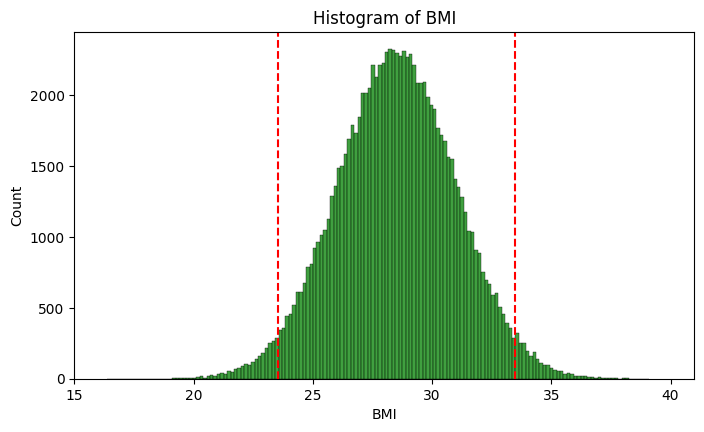

In [7]:
bmi_mean_stimated = data['BMI'].mean()
bmi_std_stimated = data['BMI'].std()
lower_bound = bmi_mean_stimated - 2*bmi_std_stimated
upper_bound = bmi_mean_stimated + 2*bmi_std_stimated
print(f"{lower_bound=}")
print(f"{upper_bound=}")
print(f"{bmi_mean=}")

plt.figure(figsize=(8, 4.5))
histplot = sns.histplot(data['BMI'], color="green")
plt.axvline(lower_bound, color='red', linestyle='--')
plt.axvline(upper_bound, color='red', linestyle='--')

plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("Histogram of BMI")
plt.xlim(15, 41)
plt.show()

In [8]:
upper_bound_count = data[data['BMI'] > upper_bound]['BMI'].count()
upper_bound_count

2321

### Cálculo de Probabilidades en la Distribución Normal

De forma similar al histograma, la distribución normal es una herramienta eficaz para calcular probabilidades y estadísticas. Cuando queremos determinar la probabilidad de encontrar un sujeto con un BMI superior a 33,5, recurrimos al cálculo del área bajo la curva de la distribución normal para los valores igual o mayores a 33,5. Esta área se divide luego por el área total bajo la curva para obtener la probabilidad.

$$ Probability = \frac{Area_{x>33.5}}{Area_{total}} $$

En nuestro análisis, encontramos que el área bajo la curva para valores mayores que 33,5 es de 0,0228. Este resultado es muy cercano a la probabilidad calculada mediante el histograma, demostrando así que la distribución normal proporciona una aproximación muy precisa de los datos reales.

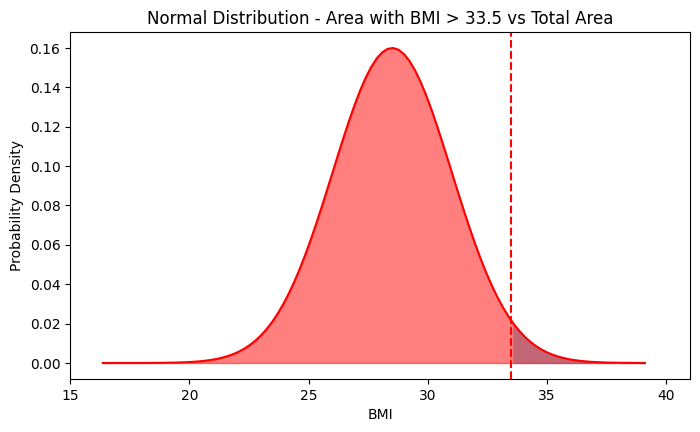

In [9]:
plt.figure(figsize=(8, 4.5))

plt.plot(x_values, y_values, color='red')
plt.fill_between(x_values, y_values, where=(x_values > upper_bound), color='skyblue')
plt.fill_between(x_values, y_values, color='red', alpha=0.5)
plt.axvline(upper_bound, color='red', linestyle='--')

plt.title('Normal Distribution - Area with BMI > 33.5 vs Total Area')
plt.xlabel('BMI')
plt.ylabel('Probability Density')
plt.xlim(15, 41)
plt.show()

### Exploración de Otras Distribuciones Estadísticas

En situaciones donde el histograma de datos no se ajusta a una distribución normal, como puede ser el caso en escenarios más realistas del Índice de Masa Corporal (BMI), es necesario considerar otras distribuciones estadísticas que reflejen más fielmente la naturaleza de los datos. Una opción viable es la distribución log-normal, particularmente adecuada cuando los datos presentan una cola larga hacia valores mayores y un sesgo positivo.

Los parámetros que definen la forma de una distribución log-normal son la media y la desviación estándar del logaritmo natural de los datos. Es crucial diferenciar estos parámetros de la media y la varianza de la distribución log-normal en sí. Cuando trabajamos con el conjunto completo de datos de una población, los valores calculados para la media y la desviación estándar del logaritmo del BMI se convierten en los parámetros poblacionales definitorios.



In [10]:
np.random.seed(0)

# Body mass index (BMI)
# https://en.wikipedia.org/wiki/Body_mass_index
# weight = BMI * height^2
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4890841/
# https://alsapakistan.com/articles/what-are-the-factors-affecting-bmi/
bmi_mean_ln = 26.5
bmi_median_ln = 25.5
bmi_std_dev_ln = 3.3
# Since the median of a lognormal distribution is exp(mu), we can get an initial estimate for mu.
bmi_mu_ln_estimate = np.log(bmi_median_ln)
# For the lognormal distribution, variance = (exp(sigma^2) - 1) * exp(2*mu + sigma^2)
# We can use this to get an initial estimate for sigma by solving for sigma in terms of the variance.
bmi_variance_ln = bmi_std_dev_ln**2
# shape parameter for lognorm is sigma of the underlying normal distribution
bmi_sigma_ln_estimate = np.sqrt(np.log(bmi_variance_ln / (bmi_median_ln**2) + 1))
# scale parameter for lognorm is exp(mu) of the underlying normal
bmi_ln_scale = np.exp(bmi_mu_ln_estimate)
# Create the lognormal distribution
ln_dist = lognorm(s=bmi_sigma_ln_estimate, scale=bmi_ln_scale)
# Generate a sample of size n
bmi_ln = ln_dist.rvs(size=n)

data_ln = pd.DataFrame({'BMI': bmi_ln})

In [11]:
def log_normal_function(data):
    log_data = np.log(data)
    mu = np.mean(log_data)
    sigma = np.std(log_data)
    x_values = np.linspace(data.min(), data.max(), 100)
    y_values = (1 / (x_values * sigma * np.sqrt(2 * np.pi))) * np.exp( - (np.log(x_values) - mu)**2 / (2 * sigma**2))
    return y_values, x_values

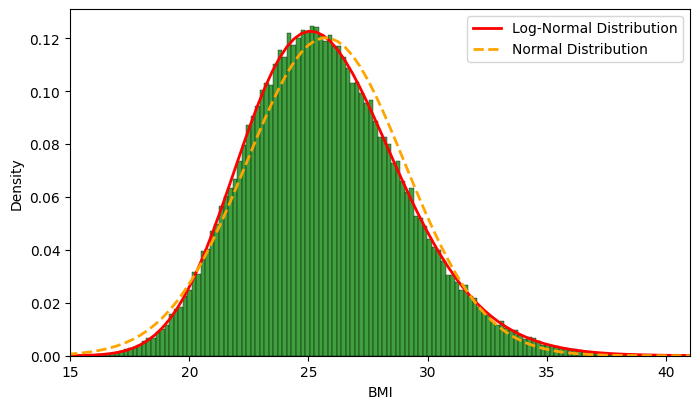

In [12]:
y_ln_values, x_ln_values = log_normal_function(data_ln['BMI'])
y_n_values, x_n_values, _, _ = normal_function(data_ln['BMI'])

plt.figure(figsize=(8, 4.5))
plt.plot(x_ln_values, y_ln_values, color='red', lw=2, label='Log-Normal Distribution')
plt.plot(x_n_values, y_n_values, color='orange', lw=2, linestyle='--', label='Normal Distribution')
histplot = sns.histplot(data_ln['BMI'], color="green", stat="density", kde=False)
plt.xlim(15, 41)
plt.legend()
plt.show()

No obstante, aunque estos conceptos son aplicables a una variedad de distribuciones estadísticas, en este análisis nos enfocaremos en la distribución normal por su presencia frecuente y su amplia utilidad en diversos campos de estudio.

## Parámetros Estimados de la Población


En la mayoría de los escenarios reales, resulta impracticable medir cada elemento de una población por limitaciones de tiempo y recursos. Por ello, en estadística se recurre a la **estimación de los parámetros poblacionales** a partir de una muestra representativa y de tamaño manejable. Este enfoque es especialmente relevante en nuestro análisis, donde se utilizan mediciones de una pequeña fracción del total de sujetos para estimar los parámetros que definen a toda la población.

El propósito de estas estimaciones es asegurar la reproducibilidad de los resultados en investigaciones y experimentos. A pesar de las variaciones en mediciones individuales, se busca que estas reflejen de manera consistente las características generales de la población completa.

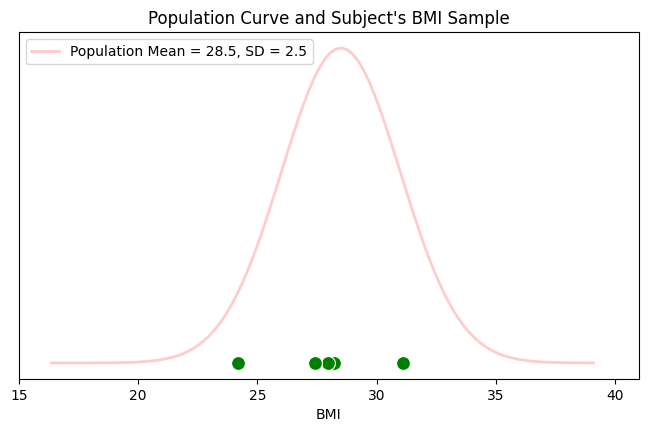

In [13]:
np.random.seed(0)
sample = data.sample(5)

plt.figure(figsize=(8, 4.5))
population_curve, = plt.plot(x_values, y_values, color='red', lw=2, alpha=0.2, label=f'Population Mean = {bmi_mean_stimated:.1f}, SD = {bmi_std_stimated:.1f}')
sample_points = sns.scatterplot(x=sample['BMI'], y=np.zeros(len(sample['BMI'])), s=100, color="green", alpha=1, marker='o', legend=False)

plt.yticks([])
plt.xlabel("BMI")
plt.title("Population Curve and Subject's BMI Sample")
plt.xlim(15, 41)
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend(loc='upper left')
plt.show()

La precisión en la estimación de estos parámetros poblacionales es fundamental para la reproducibilidad de los resultados experimentales. Esta exactitud adquiere una relevancia particular en el campo del machine learning, donde dichas mediciones se utilizan como conjunto de datos para entrenamiento. Aquí, la meta es predecir la curva que mejor representa a la población a través de algoritmos de machine learning, lo que subraya la importancia de contar con estimaciones precisas y representativas de los parámetros poblacionales.

### Variabilidad en la Estimación de Parámetros

Las estimaciones de la media poblacional y la desviación estándar poblacional pueden variar en diferentes repeticiones del experimento. Por ejemplo, en una instancia, la media estimada puede ser 27,8 y la desviación estándar 2,5. Mientras que en otra repetición, estos valores pueden cambiar a 28,1 y 1,6, respectivamente.

Este fenómeno plantea un dilema aparente: la expectativa de reproducibilidad frente a la variabilidad natural en las estimaciones de los parámetros de población.

In [14]:
def print_sample(name, data, sample_size, y_position, alpha, color, s=100, y_position_delta=0.005):
  sample = data.sample(sample_size)
  sample_points = sns.scatterplot(x=sample['BMI'], y=np.zeros(len(sample['BMI']))+y_position, s=s, color=color, alpha=alpha, marker='o', legend=False)
  sample_mean = sample['BMI'].mean()
  sample_std = sample['BMI'].std()
  print(f"{name}:")
  print(f"{sample_mean=}")
  print(f"{sample_std=}")
  plt.axvline(x=sample_mean, color=color, alpha=alpha, linestyle='--', lw=1, label=f'{name} Mean = {sample_mean:.1f}, SD = {sample_std:.1f}')
  plt.axvline(x=sample_mean - sample_std, color=color, alpha=alpha/2, linestyle=':', lw=1)
  plt.axvline(x=sample_mean + sample_std, color=color, alpha=alpha/2, linestyle=':', lw=1)
  plt.axhline(y=y_position, color=color, alpha=alpha/2, lw=1)
  plt.hlines(y=y_position + y_position_delta, xmin=sample_mean - sample_std, xmax=sample_mean + sample_std, color=color, alpha=alpha, linestyle='--', lw=1)

In [15]:
def print_sample_subplot(ax, name, data, sample_size, y_position, alpha, color, s=100, y_position_delta=0.005):
  sample = data.sample(sample_size)
  sample_points = sns.scatterplot(ax=ax, x=sample['BMI'], y=np.zeros(len(sample['BMI']))+y_position, s=s, color=color, alpha=alpha, marker='o', legend=False)
  sample_mean = sample['BMI'].mean()
  sample_std = sample['BMI'].std()
  print(f"{name}:")
  print(f"{sample_mean=}")
  print(f"{sample_std=}")
  ax.axvline(x=sample_mean, color=color, alpha=alpha, linestyle='--', lw=1, label=f'{name} Mean = {sample_mean:.1f}, SD = {sample_std:.1f}')
  ax.axvline(x=sample_mean - sample_std, color=color, alpha=alpha/2, linestyle=':', lw=1)
  ax.axvline(x=sample_mean + sample_std, color=color, alpha=alpha/2, linestyle=':', lw=1)
  ax.axhline(y=y_position, color=color, alpha=alpha/2, lw=1)
  ax.hlines(y=y_position + y_position_delta, xmin=sample_mean - sample_std, xmax=sample_mean + sample_std, color=color, alpha=alpha, linestyle='--', lw=1)

Sample:
sample_mean=27.779851818064067
sample_std=2.4560418872274052
Sample 2:
sample_mean=28.053122657002195
sample_std=1.5729698661668052


[15.0, 41.0, 15.0, 41.0]

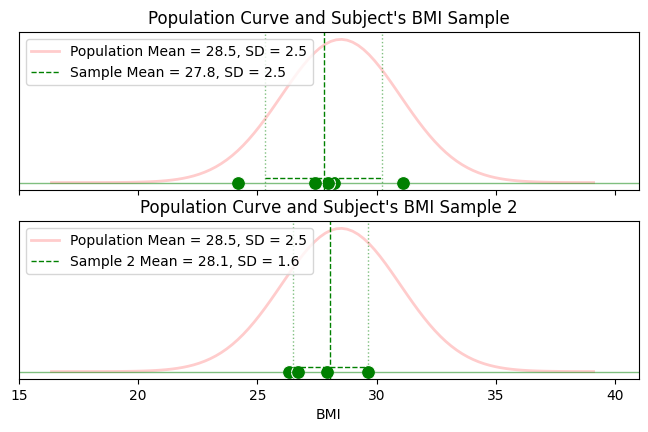

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(8, 4.5), sharex='col', sharey='row')
np.random.seed(0)

axs[0].plot(x_values, y_values, color='red', lw=2, alpha=0.2, label=f'Population Mean = {bmi_mean_stimated:.1f}, SD = {bmi_std_stimated:.1f}')
print_sample_subplot(ax=axs[0], name='Sample', data=data, sample_size=5, y_position=0, alpha=1, color='green')
axs[0].legend(loc='upper left')
axs[0].set_title("Population Curve and Subject's BMI Sample")

axs[1].plot(x_values, y_values, color='red', lw=2, alpha=0.2, label=f'Population Mean = {bmi_mean_stimated:.1f}, SD = {bmi_std_stimated:.1f}')
print_sample_subplot(ax=axs[1], name='Sample 2', data=data, sample_size=5, y_position=0, alpha=1, color='green')
axs[1].legend(loc='upper left')
axs[1].set_title("Population Curve and Subject's BMI Sample 2")

plt.setp(axs, xlim=(15, 41), yticks=[])

### Impacto del Tamaño de la Muestra en las Estimaciones Estadísticas

La reproducibilidad de los resultados estadísticos y su consistencia con la realidad poblacional dependen en gran medida del tamaño de la muestra utilizada. Esto se evidencia claramente cuando trabajamos con un número limitado de mediciones. Por ejemplo, con tan solo dos mediciones del BMI, observamos una desviación significativa en la media estimada, que es de 26,2, comparado con el valor real.

Como se muestra en la gráfica, al aumentar el volumen de datos a cinco mediciones, las estimaciones mejoran notablemente: la media estimada se ajusta a 28,1 acercándose al parámetro real de la población. Este efecto de precisión incrementada es aún más pronunciado cuando la muestra se extiende a veinte mediciones, donde ya no sólo la media estimada converge a su valor real, con un valor de 28,9 sino que la desviación estándar también converge a 2,5, su valor real.

Two Measurements:
sample_mean=26.20038638020641
sample_std=2.824200141859194
Five Measurements:
sample_mean=28.053122657002195
sample_std=1.5729698661668052
Twenty Measurements:
sample_mean=28.912228940651623
sample_std=2.527710786791591


[15.0, 41.0, 15.0, 41.0, 15.0, 41.0]

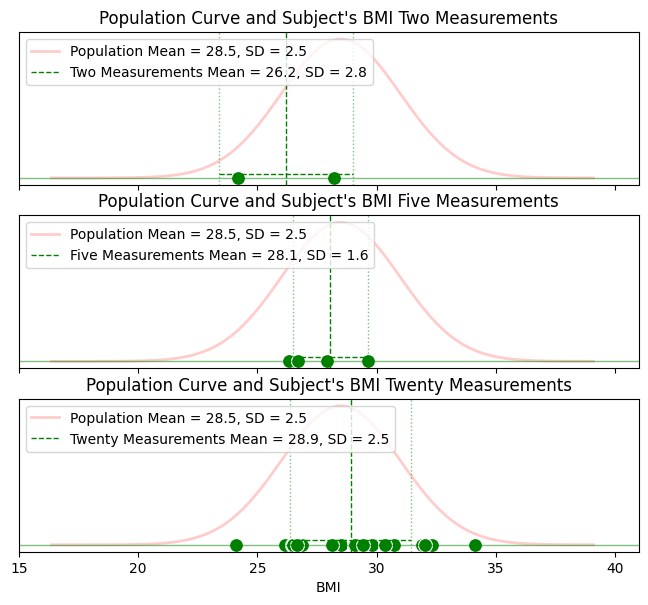

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6.75), sharex='col', sharey='row')
np.random.seed(0)

axs[0].plot(x_values, y_values, color='red', lw=2, alpha=0.2, label=f'Population Mean = {bmi_mean_stimated:.1f}, SD = {bmi_std_stimated:.1f}')
print_sample_subplot(ax=axs[0], name='Two Measurements', data=data, sample_size=2, y_position=0, alpha=1, color='green')
axs[0].legend(loc='upper left')
axs[0].set_title("Population Curve and Subject's BMI Two Measurements")

axs[1].plot(x_values, y_values, color='red', lw=2, alpha=0.2, label=f'Population Mean = {bmi_mean_stimated:.1f}, SD = {bmi_std_stimated:.1f}')
print_sample_subplot(ax=axs[1], name='Five Measurements', data=data, sample_size=5, y_position=0, alpha=1, color='green')
axs[1].legend(loc='upper left')
axs[1].set_title("Population Curve and Subject's BMI Five Measurements")

axs[2].plot(x_values, y_values, color='red', lw=2, alpha=0.2, label=f'Population Mean = {bmi_mean_stimated:.1f}, SD = {bmi_std_stimated:.1f}')
print_sample_subplot(ax=axs[2], name='Twenty Measurements', data=data, sample_size=20, y_position=0, alpha=1, color='green')
axs[2].legend(loc='upper left')
axs[2].set_title("Population Curve and Subject's BMI Twenty Measurements")

plt.setp(axs, xlim=(15, 41), yticks=[])


## Confianza en las Estimaciones Estadísticas

Uno de los objetivos principales en estadística es cuantificar la confianza en las estimaciones de los parámetros de la población. Los estadísticos utilizan comúnmente p-valores, niveles o intervalos de confianza para este fin.

Estas herramientas estadísticas proporcionan una medida cuantitativa de la confianza en las estimaciones, y generalmente, cuantos más datos se tengan, mayor será la confianza en estas estimaciones.

Al considerar experimentos replicados que resultan en diferentes estimaciones para la media y la desviación estándar poblacionales, la estadística ofrece métodos para evaluar qué tan diferentes son realmente estas estimaciones. A través del uso de estas técnicas, se puede determinar si las diferencias en las estimaciones son significativas o no. Si se encuentra que las diferencias no son significativas, se puede concluir que los resultados obtenidos de un experimento son reproducibles en otro, a pesar de las variaciones en las estimaciones de los parámetros poblacionales.

### Margen de Error

El **margen de error** refleja la variación máxima que esperamos entre la estimación de la muestra y la media real de la población, con un porcentaje de certeza igual al nivel de confianza.

Si por ejemplo elegimos un margen de error del 3% de la media poblacional de 28,5, diríamos que la diferecia entre la estimación de la media muestral y la media de la población del BMI no debería superar un margen de error de 0,855.

In [18]:
margin_of_error = 0.03 * bmi_mean
print(margin_of_error)

0.855


### Intervalo de Confianza

El **intervalo de confianza** es un rango alrededor de la estimación de la muestra que probablemente contenga el verdadero parámetro poblacional. Se encuentra sumando y restando el margen de error a la media de la muestra. Esto nos da un rango dentro del cual podemos esperar encontrar la verdadera media poblacional.

Para nuestro ejemplo, basándonos en la media poblacional y el margen de error, obtenemos un intervalo de confianza de 27,645 a 29,355. Este intervalo indica el rango dentro del cual podemos esperar encontrar la verdadera media poblacional.

Cabe anotar que, en situaciones reales, este intervalo se basaría en la media de la muestra.

In [19]:
confidence_interval_lower = bmi_mean - margin_of_error
confidence_interval_upper = bmi_mean + margin_of_error
print(confidence_interval_lower, confidence_interval_upper)

27.645 29.355


### Nivel de Confianza y Valor Z

El **nivel de confianza** es un porcentaje que refleja qué tan seguro queremos estar de que el intervalo de confianza calculado contenga el verdadero parámetro poblacional. Por ejemplo, un nivel de confianza del 95% significa que si tomáramos muchas muestras y calculáramos un intervalo de confianza para cada una, esperaríamos que aproximadamente en el 95% de los casos esos intervalos contengan la media real de la población.

El nivel de confianza se asocia con un valor z, que para un nivel de confianza de 95% es aproximadamente 1,96. Este valor z nos ayuda a determinar cuántas desviaciones estándar (error estándar) una estimación está alejada de la media esperada.

In [20]:
confidence_level = 0.95
z = norm.ppf((1 + confidence_level) / 2)
print(z)

1.959963984540054


### Error Estándar

El **error estándar** es un estimador de la desviación estándar de la media muestral. Nos indica qué tan precisas son nuestras estimaciones de la media si repitiéramos el muestreo varias veces.

Podemos calcular el error estándar para que, multiplicándolo por el número de desviaciones estándar z correspondientes al nivel de confianza definido, obtengamos el margen de error requerido.

Para nuestro ejemplo obtenemos que, para un margen de error de 0,855 y un nivel de confianza de 95%, con un z de 1,96, se requiere un error estándar de 0,436.

Dado que error estándar es un estimador de la desviación estándar de la media muestral, podemos generarlo dividiendo la desviación estándar de la población por la raiz cuadrada del tamaño de la muestra.

De esta manera, el error estándar disminuye a medida que el tamaño de la muestra aumenta, lo que significa que las estimaciones de la media se vuelven más precisas con muestras más grandes.

In [21]:
standard_error = margin_of_error / z
print(standard_error)

0.43623250567057914


### Tamaño de la Muestra

Podemos calcular el **tamaño de la muestra** necesario para alcanzar el error estándar deseado, dividiendo la desviación estándar poblacional por error estándar y elevando este resultado al cuadrado, donde el tamaño de la muestra es aproximadamente 33 individuos. Este es el tamaño necesario para lograr nuestro margen de error del 3% con un nivel de confianza del 95%.

En la práctica, utilizaríamos la desviación estándar de la muestra para este cálculo, y el error estándar actuaría como un estimador de esta variabilidad.



In [22]:
sample_size = round((bmi_std / standard_error) ** 2)
print(sample_size)

33


### Comprobando Presición de las Estimaciones

Podemos observar que si obtenemos 1.000 muestras, con 33 indiviudos cada una, solo la media de 45 de estas se sale del intervalo de confianza, un 4,5% del total, muy cercano al 5% de nuestro cáculo teórico.

In [23]:
np.random.seed(0)
size_error_5 = 33
num_of_samples = 1000
num_of_frames = 100
samples_per_frame = num_of_samples // num_of_frames

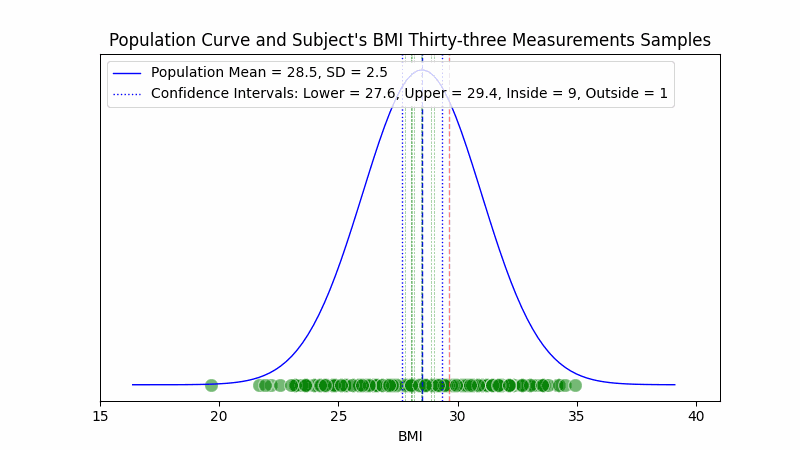

In [24]:
fps=6
fig, ax = plt.subplots(figsize=(8, 4.5))

scatp = None
inside = 0
outside = 0
L = None

def init():
  global L
  ax.population_curve, = plt.plot(x_values, y_values, color='blue', lw=1, alpha=1, label=f'Population Mean = {bmi_mean_stimated:.1f}, SD = {bmi_std_stimated:.1f}')
  ax.axvline(x=bmi_mean, color='blue', alpha=1, linestyle='--', lw=1)
  ax.axvline(x=confidence_interval_lower, color='blue', alpha=1, linestyle=':', lw=1, label=f'Confidence Intervals: Lower = {confidence_interval_lower:.1f}, Upper = {confidence_interval_upper:.1f}, Inside = {inside}, Outside = {outside}')
  ax.axvline(x=confidence_interval_upper, color='blue', alpha=1, linestyle=':', lw=1)
  ax.set_yticks([])
  ax.set_xlim(15, 41)
  ax.set_xlabel("BMI")
  ax.set_title("Population Curve and Subject's BMI Thirty-three Measurements Samples")
  ax.get_yaxis().set_visible(False)
  L=ax.legend(loc='upper left')

def update(frame):
  global scatp
  global inside
  global outside
  global L
  if scatp is not None:
      for artist in scatp.collections:
        artist.remove()

  for _ in range(samples_per_frame):
    sample = data.sample(size_error_5)
    scatp = sns.scatterplot(x=sample['BMI'], y=np.zeros(len(sample['BMI'])), s=100, color='green', alpha=0.5, marker='o', legend=False)
    sample_mean = sample['BMI'].mean()
    if sample_mean >= confidence_interval_lower and sample_mean <= confidence_interval_upper:
      color, lw, linestyle ='green', 0.5, '--'
      inside+=1
    else:
      color, lw, linestyle ='red', 1, ':'
      outside+=1

    ax.axvline(x=sample_mean, color=color, alpha=0.5, linestyle='--', lw=lw, label=f'Inside = {inside}, Outside = {outside}')
    L.get_texts()[1].set_text(f'Confidence Intervals: Lower = {confidence_interval_lower:.1f}, Upper = {confidence_interval_upper:.1f}, Inside = {inside}, Outside = {outside}')



ani = FuncAnimation(fig, update, frames=range(num_of_frames), init_func=init, repeat=False)

gif_path = "sample_error_5.gif"
ani.save(gif_path, writer='pillow', fps=fps)
plt.close()
Image(open(gif_path,'rb').read())

## Conclusiones

La estimación de parámetros poblacionales a partir de muestras representativas es una práctica estándar en la estadística, esencial para la interpretación y el análisis de datos en diversas disciplinas. La precisión de estas estimaciones, influenciada por el tamaño de la muestra y la variabilidad inherente a los datos, es fundamental para garantizar la reproducibilidad y la fiabilidad de los hallazgos.

Los conceptos de margen de error e intervalos de confianza son herramientas valiosas para cuantificar la confianza en estas estimaciones, permitiendo que investigadores y profesionales tomen decisiones informadas basadas en datos. En última instancia, la comprensión profunda de estos principios estadísticos es crucial para avanzar en el conocimiento y la aplicación efectiva de técnicas en campos emergentes como la inteligencia artificial y el aprendizaje automático, donde la precisión de los datos es primordial.